## Introduction

Sometimes we need to perform quick analysis on an open dataset but downloading fastq and performing quantification can take more time than you wan't to invest.
Fortunately, [EMBL](https://www.ebi.ac.uk/gxa/sc/home) has already processed bunch of open single-cell experiments with alevin. 

In [2]:
library(Matrix)

CountsFromEMBL <- function(id) {
  url <- paste0("https://www.ebi.ac.uk/gxa/sc/experiment/", id,
                "/download/zip?fileType=quantification-raw&accessKey=")
  zip.file <- paste0(id, ".zip")
  barcode.file <- paste0(id, ".aggregated_filtered_counts.mtx_cols")
  features.file <- paste0(id, ".aggregated_filtered_counts.mtx_rows")
  data.file <- paste0(id, ".aggregated_filtered_counts.mtx")
  download.file(url, zip.file)
  unzip(zip.file)
  data <- readMM(file = data.file)
  barcode.names <- readLines(barcode.file)
  features.names <- readLines(features.file)
  colnames(data) <- barcode.names
  rownames(data) <- features.names
  data
}

# Case Study

[Ace2](https://www.nejm.org/doi/full/10.1056/NEJMsr2005760) gene is frequently being linked with Covid-19 and I'm interested in exploring it's expression in mouse lung model.
After a quick search I found an experiment on the lungs of aging mouse with 3 months and 24 months. To download the data all we need is the experiment-id, for this experiment it's `E-CURD-9`.

In [3]:
cts <- CountsFromEMBL("E-CURD-9")

In [4]:
dim(cts)

[1] 19632 12185

In [8]:
library(Seurat)
library(dplyr)
ecurd <- CreateSeuratObject(cts)
ecurd


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
ecurd <- FindVariableFeatures(ecurd) %>% NormalizeData() %>% ScaleData() %>% RunPCA() %>% RunUMAP(dims=1:30)

Centering and scaling data matrix

PC_ 1 
Positive:  ENSMUSG00000070306	ENSMUSG00000070306, ENSMUSG00000043164	ENSMUSG00000043164, ENSMUSG00000049154	ENSMUSG00000049154, ENSMUSG00000034467	ENSMUSG00000034467, ENSMUSG00000024033	ENSMUSG00000024033, ENSMUSG00000028139	ENSMUSG00000028139, ENSMUSG00000028441	ENSMUSG00000028441, ENSMUSG00000054986	ENSMUSG00000054986, ENSMUSG00000044772	ENSMUSG00000044772, ENSMUSG00000026831	ENSMUSG00000026831 
	   ENSMUSG00000026649	ENSMUSG00000026649, ENSMUSG00000053783	ENSMUSG00000053783, ENSMUSG00000027676	ENSMUSG00000027676, ENSMUSG00000014846	ENSMUSG00000014846, ENSMUSG00000038370	ENSMUSG00000038370, ENSMUSG00000031022	ENSMUSG00000031022, ENSMUSG00000041323	ENSMUSG00000041323, ENSMUSG00000048416	ENSMUSG00000048416, ENSMUSG00000118506	ENSMUSG00000118506, ENSMUSG00000046242	ENSMUSG00000046242 
	   ENSMUSG00000036598	ENSMUSG00000036598, ENSMUSG00000040703	ENSMUSG00000040703, ENSMUSG00000026546	ENSMUSG00000026546, ENSMUSG00000013822	ENSMUSG00000013822, ENS

In [10]:
ecurd

An object of class Seurat 
19632 features across 12185 samples within 1 assay 
Active assay: RNA (19632 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

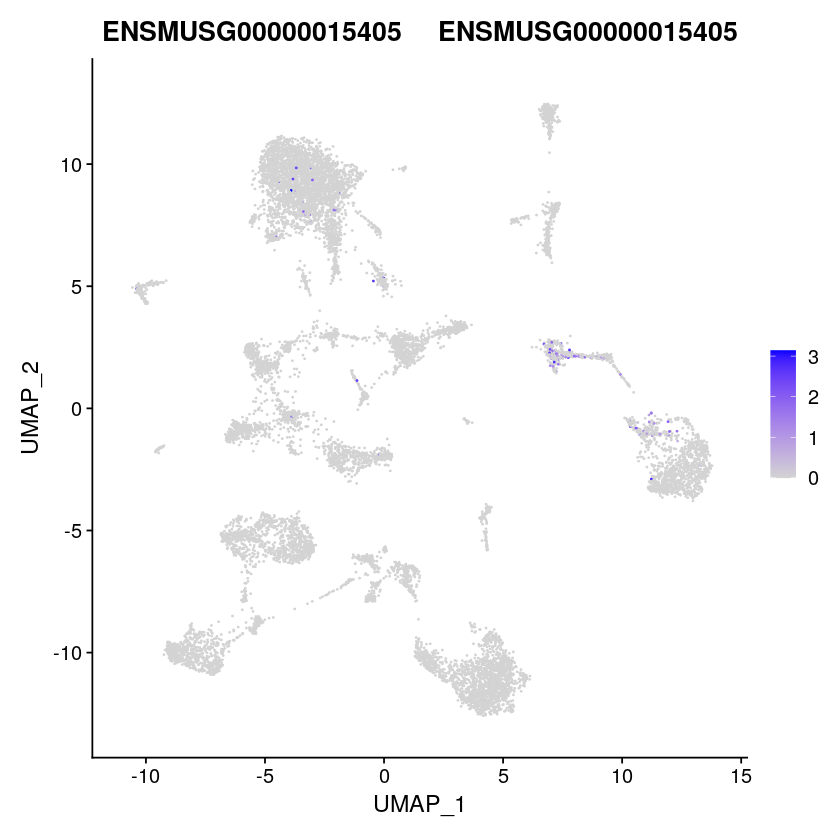

In [15]:
FeaturePlot(ecurd, "ENSMUSG00000015405\tENSMUSG00000015405")

In [16]:
system("wget https://www.ebi.ac.uk/gxa/sc/experiment/E-CURD-9/download?fileType=experiment-design&accessKey=", intern=T)

character(0)

Let's download the cell-wise annotation and add it to Seuray object

In [31]:
anno <- read.csv("download?fileType=experiment-design", sep="\t")
anno <- anno[c("Assay", "Factor.Value.age.")]

In [32]:
rownames(anno) <- anno$Assay
anno$Assay <- NULL

In [33]:
ecurd$Anno <- anno

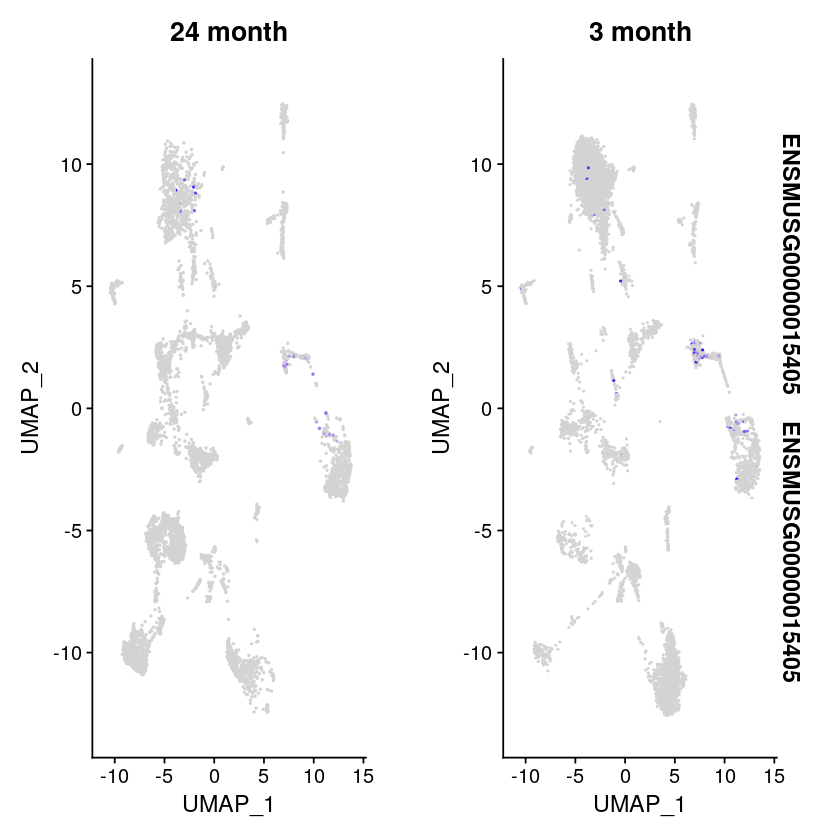

In [34]:
FeaturePlot(ecurd, "ENSMUSG00000015405\tENSMUSG00000015405", split.by = "Anno")